In [116]:
from sqlalchemy import create_engine
from sqlalchemy import inspect
import pandas as pd
from datetime import datetime as dt

In [300]:
engine = create_engine('sqlite:///mta_data.db')

In [118]:
insp = inspect(engine)
print(insp.get_table_names())
inspect(engine)

['mta_data']


In [419]:
SQL_Table = pd.read_sql('SELECT STATION, DATE, ENTRIES FROM mta_data WHERE STATION == "34 ST-PENN STA" OR STATION == "FULTON ST" ORDER BY ENTRIES DESC LIMIT 100000;',engine)
SQL_Table

,STATION,DATE,ENTRIES
0,FULTON ST,09/03/2021,1662547104
1,FULTON ST,09/03/2021,1662547076
2,FULTON ST,09/03/2021,1662546987
3,FULTON ST,09/03/2021,1662546951
4,FULTON ST,09/03/2021,1662546939
...,...,...,...
99995,34 ST-PENN STA,04/05/2021,4085001
99996,34 ST-PENN STA,04/05/2021,4084944
99997,34 ST-PENN STA,04/05/2021,4084917
99998,34 ST-PENN STA,04/05/2021,4084843


In [420]:
SQL_Table = pd.read_sql('SELECT STATION, COUNT(ENTRIES) FROM mta_data GROUP BY STATION HAVING STATION == "34 ST-PENN STA" OR STATION == "FULTON ST";',engine)
SQL_Table

,STATION,COUNT(ENTRIES)
0,34 ST-PENN STA,153853
1,FULTON ST,145039


In [119]:
#MTA DB Import using for loop
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt" #url with formatting to fill in the number of the particular week
    dfs = []
    for week_num in week_nums: #for each week
        file_url = url.format(week_num) #format the url so it grabs that week
        dfs.append(pd.read_csv(file_url)) #append to our empty list
    return pd.concat(dfs) #combine files for each week
        
week_nums = [210306, 210313, 210320, 210327, 210403, 210410, 210417, 210424, 210501, 210508, 210515, 210522, 210529, 210605, 210612, 210619, 210626, 210703, 210710, 210710, 210717, 210724, 210731, 210807, 210814, 210821, 210828, 210904]
turnstiles_df = get_data(week_nums) #use our function to get a df with all of our data

In [120]:
#Pull in all MTA DATA to CSV -- > from March through Sept '21
turnstiles_df.to_csv('mta_data_all.csv', header = False, index = False)

In [121]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582


In [122]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [123]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [124]:
# Data from March 1 - September 3rd 2021
turnstiles_df.DATE.value_counts().sort_index()

02/27/2021    29985
02/28/2021    29763
03/01/2021    29868
03/02/2021    29803
03/03/2021    29871
              ...  
08/30/2021    30738
08/31/2021    29865
09/01/2021    30159
09/02/2021    29664
09/03/2021    29534
Name: DATE, Length: 189, dtype: int64

In [125]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [126]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434,2021-02-27 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445,2021-02-27 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500,2021-02-27 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546,2021-02-27 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582,2021-02-27 19:00:00


In [127]:
mask = ((turnstiles_df["C/A"] == "A002") &
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,03:00:00,REGULAR,7537255,2570434,2021-02-27 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,07:00:00,REGULAR,7537260,2570445,2021-02-27 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,11:00:00,REGULAR,7537285,2570500,2021-02-27 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,15:00:00,REGULAR,7537354,2570546,2021-02-27 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/27/2021,19:00:00,REGULAR,7537501,2570582,2021-02-27 19:00:00


In [128]:
mask = ((turnstiles_df["C/A"] == "R626") & 
(turnstiles_df["UNIT"] == "R062") & 
(turnstiles_df["SCP"] == "00-00-00") & 
(turnstiles_df["STATION"] == "CROWN HTS-UTICA"))

turnstiles_df[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
202276,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,02/27/2021,03:00:00,REGULAR,15825762,3497209,2021-02-27 03:00:00
202277,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,02/27/2021,07:00:00,REGULAR,15825822,3497213,2021-02-27 07:00:00
202278,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,02/27/2021,11:00:00,REGULAR,15825988,3497235,2021-02-27 11:00:00
202279,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,02/27/2021,15:00:00,REGULAR,15826133,3497262,2021-02-27 15:00:00
202280,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,02/27/2021,19:00:00,REGULAR,15826282,3497309,2021-02-27 19:00:00


In [129]:
#Verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
3084611,N606,R025,00-00-01,JAMAICA CENTER,2021-07-03 21:02:29,2
1693086,N094,R029,01-06-03,WORLD TRADE CTR,2021-07-07 16:00:00,2
1693092,N094,R029,01-06-03,WORLD TRADE CTR,2021-07-08 16:00:00,2
1693091,N094,R029,01-06-03,WORLD TRADE CTR,2021-07-08 12:00:00,2
1693090,N094,R029,01-06-03,WORLD TRADE CTR,2021-07-08 08:00:00,2
1693089,N094,R029,01-06-03,WORLD TRADE CTR,2021-07-08 04:00:00,2
1693088,N094,R029,01-06-03,WORLD TRADE CTR,2021-07-08 00:00:00,2
1693087,N094,R029,01-06-03,WORLD TRADE CTR,2021-07-07 20:00:00,2
1693085,N094,R029,01-06-03,WORLD TRADE CTR,2021-07-07 12:00:00,2
1693094,N094,R029,01-06-03,WORLD TRADE CTR,2021-07-09 00:00:00,2


In [130]:
turnstiles_df.DESC.value_counts()

REGULAR       5834718
RECOVR AUD      25072
Name: DESC, dtype: int64

In [131]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [132]:
#Second Verification that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-02-27 03:00:00,1
3766643,R138,R293,00-05-00,34 ST-PENN STA,2021-05-24 22:00:00,1
3766651,R138,R293,00-05-00,34 ST-PENN STA,2021-05-26 06:00:00,1
3766650,R138,R293,00-05-00,34 ST-PENN STA,2021-05-26 02:00:00,1
3766649,R138,R293,00-05-00,34 ST-PENN STA,2021-05-25 22:00:00,1


In [133]:
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [134]:
#Entries are cumulative, use .first() to show first item of the groupby that is descending for the last reading
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,02/27/2021,7537589
1,A002,R051,02-00-00,59 ST,02/28/2021,7537852
2,A002,R051,02-00-00,59 ST,03/01/2021,7538400
3,A002,R051,02-00-00,59 ST,03/02/2021,7538926
4,A002,R051,02-00-00,59 ST,03/03/2021,7539503
...,...,...,...,...,...,...
943779,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554
943780,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/31/2021,5554
943781,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/01/2021,5554
943782,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/02/2021,5554


In [135]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])[["DATE", "ENTRIES"]]
                                                       .shift(1))
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,02/27/2021,7537589,NaN,NaN
1,A002,R051,02-00-00,59 ST,02/28/2021,7537852,02/27/2021,7537589.0
2,A002,R051,02-00-00,59 ST,03/01/2021,7538400,02/28/2021,7537852.0
3,A002,R051,02-00-00,59 ST,03/02/2021,7538926,03/01/2021,7538400.0
4,A002,R051,02-00-00,59 ST,03/03/2021,7539503,03/02/2021,7538926.0


In [136]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
943779,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554,08/29/2021,5554.0
943780,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/31/2021,5554,08/30/2021,5554.0
943781,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/01/2021,5554,08/31/2021,5554.0
943782,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/02/2021,5554,09/01/2021,5554.0
943783,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/03/2021,5554,09/02/2021,5554.0


In [137]:
# Drops the row for the earliest date
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [138]:
#shows data is still incorrect by distant stat summary
(turnstiles_daily["ENTRIES"] - turnstiles_daily["PREV_ENTRIES"]).describe()

count    9.387090e+05
mean    -4.923313e+03
std      4.949360e+06
min     -1.604323e+09
25%      7.100000e+01
50%      2.410000e+02
75%      4.870000e+02
max      2.139011e+09
dtype: float64

In [139]:
#backwards row check
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].shape

(8784, 8)

In [140]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
779,A002,R051,02-03-02,59 ST,03/22/2021,238,03/21/2021,6641395.0
7372,A011,R080,01-03-00,57 ST-7 AV,02/28/2021,885620240,02/27/2021,885620355.0
7373,A011,R080,01-03-00,57 ST-7 AV,03/01/2021,885620021,02/28/2021,885620240.0
7374,A011,R080,01-03-00,57 ST-7 AV,03/02/2021,885619834,03/01/2021,885620021.0
7375,A011,R080,01-03-00,57 ST-7 AV,03/03/2021,885619673,03/02/2021,885619834.0


In [141]:
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].groupby(["C/A", "UNIT", "SCP", "STATION"]).size())

C/A    UNIT  SCP       STATION        
A002   R051  02-03-02  59 ST                1
A011   R080  01-03-00  57 ST-7 AV         188
             01-03-03  57 ST-7 AV           1
             01-03-04  57 ST-7 AV           1
A013   R081  01-06-01  49 ST                2
                                         ... 
R646   R110  01-00-02  FLATBUSH AV-B.C      1
R730   R431  00-00-04  EASTCHSTER/DYRE    187
S101   R070  00-00-02  ST. GEORGE           1
             00-00-04  ST. GEORGE           1
TRAM2  R469  00-05-00  RIT-ROOSEVELT        1
Length: 345, dtype: int64

In [142]:
def get_daily_counts(row, max_counter):
    '''
    Initial attempt at dealing with reversed counters
    '''
    
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    
    if counter < 0:
        counter = -counter  # adjust for "reverse" counter
        
    if counter > max_counter:
        # If counter (daily count) is > 1M, then the counter might have been reset.  
        # Set count to zero as different counters have different cycle limits
        print(f'entries: {row["ENTRIES"]} <-- {row["PREV_ENTRIES"]}')

        return 0
    
    return counter


turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

entries: 238 <-- 6641395.0
entries: 3082 <-- 1390173.0
entries: 18 <-- 4340953.0
entries: 117 <-- 11715665.0
entries: 738 <-- 18398229.0
entries: 14 <-- 1028362.0
entries: 25 <-- 1400020.0
entries: 327680 <-- 756269765.0
entries: 262152 <-- 553649999.0
entries: 262152 <-- 229572623.0
entries: 353 <-- 8049630.0
entries: 0 <-- 5309746.0
entries: 80 <-- 1640812.0
entries: 101 <-- 2651127.0
entries: 104 <-- 17275602.0
entries: 167790157 <-- 702266.0
entries: 262272 <-- 2255518.0
entries: 393225 <-- 7714275.0
entries: 48 <-- 8724126.0
entries: 2147432315 <-- 8421808.0
entries: 16712028 <-- 6294957.0
entries: 177 <-- 16712669.0
entries: 262144 <-- 33554713.0
entries: 24 <-- 2627860.0
entries: 106 <-- 67960951.0
entries: 232 <-- 4735529.0
entries: 153 <-- 1604971.0
entries: 5946 <-- 4298704.0
entries: 0 <-- 117440512.0
entries: 147 <-- 11567738.0
entries: 135 <-- 8882903.0
entries: 1950 <-- 13809288.0
entries: 54 <-- 7903750.0
entries: 113 <-- 4454729.0
entries: 158 <-- 7643335.0
entries: 471

In [143]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,02/28/2021,7537852,02/27/2021,7537589.0,263.0
2,A002,R051,02-00-00,59 ST,03/01/2021,7538400,02/28/2021,7537852.0,548.0
3,A002,R051,02-00-00,59 ST,03/02/2021,7538926,03/01/2021,7538400.0,526.0
4,A002,R051,02-00-00,59 ST,03/03/2021,7539503,03/02/2021,7538926.0,577.0
5,A002,R051,02-00-00,59 ST,03/04/2021,7540040,03/03/2021,7539503.0,537.0


In [144]:
turnstiles_daily.DAILY_ENTRIES.describe()

count    938709.000000
mean        403.704398
std        5451.129185
min           0.000000
25%          77.000000
50%         246.000000
75%         494.000000
max      993455.000000
Name: DAILY_ENTRIES, dtype: float64

In [145]:
ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,02/28/2021,2002.0
1,A002,R051,59 ST,03/01/2021,4187.0
2,A002,R051,59 ST,03/02/2021,4459.0
3,A002,R051,59 ST,03/03/2021,4575.0
4,A002,R051,59 ST,03/04/2021,4526.0


In [146]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,02/28/2021,3639.0
1,1 AV,03/01/2021,6086.0
2,1 AV,03/02/2021,6254.0
3,1 AV,03/03/2021,6557.0
4,1 AV,03/04/2021,6506.0


In [147]:
#shows the busiest 20 stations from the data captured
station_totals = station_daily.groupby('STATION')['DAILY_ENTRIES'].sum() \
    .reset_index() \
    .sort_values('DAILY_ENTRIES', ascending=False)

top_20_station_totals = station_totals.head(20)
top_20_station_totals

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,8832669.0
59,34 ST-HERALD SQ,7305026.0
110,86 ST,6792094.0
315,PATH NEW WTC,6658701.0
226,FULTON ST,6584796.0
233,GRD CNTRL-42 ST,5921814.0
46,23 ST,5545533.0
9,125 ST,5473808.0
68,42 ST-PORT AUTH,5026059.0
353,TIMES SQ-42 ST,4943745.0


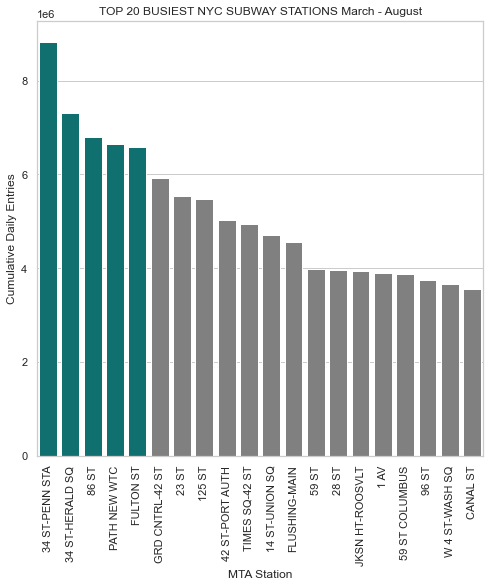

In [261]:
#graph shows top 20 busiest stations -- > top 5 stations are: 34 ST-PENN STA, 34 ST-HERALD SQ, 86 ST, PATH NEW WTC, FULTON ST
import seaborn as sns
import matplotlib.pylab as plt

sns.set(rc ={'figure.figsize':(8,8)})
sns.set_theme(style = "whitegrid")
colrs = ['teal' if x >= 6584796 else 'gray' for x in top_20_station_totals['DAILY_ENTRIES']]
sns.barplot(x = top_20_station_totals['STATION'], y= top_20_station_totals['DAILY_ENTRIES'], data = top_20_station_totals, palette = colrs).set_title('TOP 20 BUSIEST NYC SUBWAY STATIONS March - August')
plt.xticks(rotation = 90)
plt.ylabel("Cumulative Daily Entries")
plt.xlabel("MTA Station")
plt.show()

In [149]:
station_totals.head(30)

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,8832669.0
59,34 ST-HERALD SQ,7305026.0
110,86 ST,6792094.0
315,PATH NEW WTC,6658701.0
226,FULTON ST,6584796.0
233,GRD CNTRL-42 ST,5921814.0
46,23 ST,5545533.0
9,125 ST,5473808.0
68,42 ST-PORT AUTH,5026059.0
353,TIMES SQ-42 ST,4943745.0


In [153]:
#PENN station mask
PENN_STATION_mask = (turnstiles_daily["STATION"] == "34 ST-PENN STA")
PENN_STATION[PENN_STATION_mask]

/var/folders/q_/d6nfnskx52d1nw5kyyp1bpnh0000gn/T/ipykernel_96490/3989230600.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  PENN_STATION[PENN_STATION_mask]


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,MONTH,WEEK
248944,N067,R012,00-00-00,34 ST-PENN STA,02/28/2021,233614,02/27/2021,233504.0,110.0,2,8
248945,N067,R012,00-00-00,34 ST-PENN STA,03/01/2021,233787,02/28/2021,233614.0,173.0,3,9
248946,N067,R012,00-00-00,34 ST-PENN STA,03/02/2021,233962,03/01/2021,233787.0,175.0,3,9
248947,N067,R012,00-00-00,34 ST-PENN STA,03/03/2021,234177,03/02/2021,233962.0,215.0,3,9
248948,N067,R012,00-00-00,34 ST-PENN STA,03/04/2021,234373,03/03/2021,234177.0,196.0,3,9
...,...,...,...,...,...,...,...,...,...,...,...
634170,R142,R293,01-06-01,34 ST-PENN STA,08/30/2021,68092990,08/29/2021,68092830.0,160.0,8,35
634171,R142,R293,01-06-01,34 ST-PENN STA,08/31/2021,68093174,08/30/2021,68092990.0,184.0,8,35
634172,R142,R293,01-06-01,34 ST-PENN STA,09/01/2021,68093339,08/31/2021,68093174.0,165.0,9,35
634173,R142,R293,01-06-01,34 ST-PENN STA,09/02/2021,68093463,09/01/2021,68093339.0,124.0,9,35


In [151]:
PENN_STATION['MONTH'] = pd.DatetimeIndex(PENN_STATION['DATE']).month
PENN_STATION.head(20)

/var/folders/q_/d6nfnskx52d1nw5kyyp1bpnh0000gn/T/ipykernel_96490/3719207645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PENN_STATION['MONTH'] = pd.DatetimeIndex(PENN_STATION['DATE']).month


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,MONTH,WEEK
248944,N067,R012,00-00-00,34 ST-PENN STA,02/28/2021,233614,02/27/2021,233504.0,110.0,2,8
248945,N067,R012,00-00-00,34 ST-PENN STA,03/01/2021,233787,02/28/2021,233614.0,173.0,3,9
248946,N067,R012,00-00-00,34 ST-PENN STA,03/02/2021,233962,03/01/2021,233787.0,175.0,3,9
248947,N067,R012,00-00-00,34 ST-PENN STA,03/03/2021,234177,03/02/2021,233962.0,215.0,3,9
248948,N067,R012,00-00-00,34 ST-PENN STA,03/04/2021,234373,03/03/2021,234177.0,196.0,3,9
248949,N067,R012,00-00-00,34 ST-PENN STA,03/05/2021,234604,03/04/2021,234373.0,231.0,3,9
248950,N067,R012,00-00-00,34 ST-PENN STA,03/06/2021,234753,03/05/2021,234604.0,149.0,3,9
248951,N067,R012,00-00-00,34 ST-PENN STA,03/07/2021,235027,03/06/2021,234753.0,274.0,3,9
248952,N067,R012,00-00-00,34 ST-PENN STA,03/08/2021,235290,03/07/2021,235027.0,263.0,3,10
248953,N067,R012,00-00-00,34 ST-PENN STA,03/09/2021,235524,03/08/2021,235290.0,234.0,3,10


In [162]:
PENN_STATION_WEEKLY = PENN_STATION.groupby('MONTH').DAILY_ENTRIES.sum().reset_index()
PENN_STATION_WEEKLY

,MONTH,DAILY_ENTRIES
0,2,48143.0
1,3,1326329.0
2,4,980116.0
3,5,1544341.0
4,6,1509131.0
5,7,1769910.0
6,8,1537309.0
7,9,117390.0


In [205]:
month_mask = ((PENN_STATION_WEEKLY['MONTH'] > 2) & (PENN_STATION_WEEKLY["MONTH"] < 9))
PENN_STATION_filtered = PENN_STATION_WEEKLY[month_mask]
PENN_STATION_filtered

,MONTH,DAILY_ENTRIES
1,3,1326329.0
2,4,980116.0
3,5,1544341.0
4,6,1509131.0
5,7,1769910.0
6,8,1537309.0


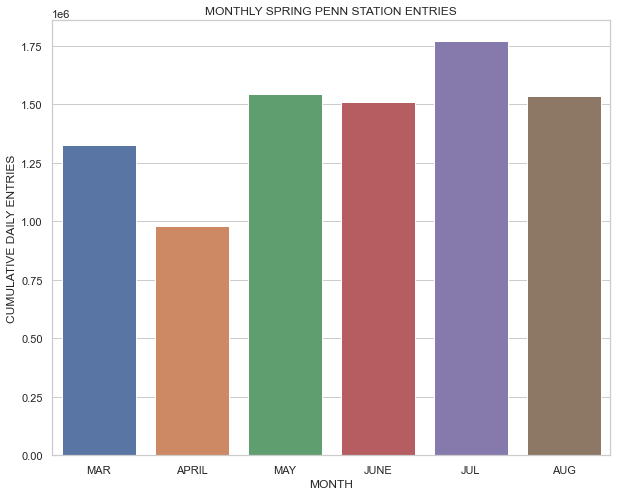

In [264]:
#Penn Station Monthly Figure
sns.set(rc ={'figure.figsize':(10,8)})
sns.set_theme(style = "whitegrid")
sns.barplot(x = PENN_STATION_filtered.MONTH, y= PENN_STATION_filtered['DAILY_ENTRIES'], data = PENN_STATION_filtered, palette = None).set_title('MONTHLY SPRING PENN STATION ENTRIES')
plt.xticks([0,1,2,3,4,5],['MAR','APRIL','MAY','JUNE','JUL','AUG'])
plt.ylabel("CUMULATIVE DAILY ENTRIES")
plt.show()

In [219]:
#Herald Square Mask
HERALD_SQUARE_MASK = (turnstiles_daily["STATION"] == "34 ST-HERALD SQ")
HERALD_SQUARE_maskapplied = turnstiles_daily[HERALD_SQUARE_MASK]
HERALD_SQUARE_maskapplied

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
14932,A022,R022,01-00-00,34 ST-HERALD SQ,02/28/2021,28740034,02/27/2021,28739543.0,491.0
14933,A022,R022,01-00-00,34 ST-HERALD SQ,03/01/2021,28741115,02/28/2021,28740034.0,1081.0
14934,A022,R022,01-00-00,34 ST-HERALD SQ,03/02/2021,28742258,03/01/2021,28741115.0,1143.0
14935,A022,R022,01-00-00,34 ST-HERALD SQ,03/03/2021,28743434,03/02/2021,28742258.0,1176.0
14936,A022,R022,01-00-00,34 ST-HERALD SQ,03/04/2021,28744582,03/03/2021,28743434.0,1148.0
...,...,...,...,...,...,...,...,...,...
458017,N507,R023,00-03-06,34 ST-HERALD SQ,08/30/2021,1401417,08/29/2021,1400125.0,1292.0
458018,N507,R023,00-03-06,34 ST-HERALD SQ,08/31/2021,1402840,08/30/2021,1401417.0,1423.0
458019,N507,R023,00-03-06,34 ST-HERALD SQ,09/01/2021,1404269,08/31/2021,1402840.0,1429.0
458020,N507,R023,00-03-06,34 ST-HERALD SQ,09/02/2021,1405233,09/01/2021,1404269.0,964.0


In [220]:
#herald sq month column addition 
HERALD_SQUARE_maskapplied['MONTH'] = pd.DatetimeIndex(HERALD_SQUARE_maskapplied['DATE']).month
HERALD_SQUARE_maskapplied

/var/folders/q_/d6nfnskx52d1nw5kyyp1bpnh0000gn/T/ipykernel_96490/589298612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HERALD_SQUARE_maskapplied['MONTH'] = pd.DatetimeIndex(HERALD_SQUARE_maskapplied['DATE']).month


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,MONTH
14932,A022,R022,01-00-00,34 ST-HERALD SQ,02/28/2021,28740034,02/27/2021,28739543.0,491.0,2
14933,A022,R022,01-00-00,34 ST-HERALD SQ,03/01/2021,28741115,02/28/2021,28740034.0,1081.0,3
14934,A022,R022,01-00-00,34 ST-HERALD SQ,03/02/2021,28742258,03/01/2021,28741115.0,1143.0,3
14935,A022,R022,01-00-00,34 ST-HERALD SQ,03/03/2021,28743434,03/02/2021,28742258.0,1176.0,3
14936,A022,R022,01-00-00,34 ST-HERALD SQ,03/04/2021,28744582,03/03/2021,28743434.0,1148.0,3
...,...,...,...,...,...,...,...,...,...,...
458017,N507,R023,00-03-06,34 ST-HERALD SQ,08/30/2021,1401417,08/29/2021,1400125.0,1292.0,8
458018,N507,R023,00-03-06,34 ST-HERALD SQ,08/31/2021,1402840,08/30/2021,1401417.0,1423.0,8
458019,N507,R023,00-03-06,34 ST-HERALD SQ,09/01/2021,1404269,08/31/2021,1402840.0,1429.0,9
458020,N507,R023,00-03-06,34 ST-HERALD SQ,09/02/2021,1405233,09/01/2021,1404269.0,964.0,9


In [221]:
#Herald square group by month, summation
HERALD_SQ_monthlysum = HERALD_SQUARE_maskapplied.groupby('MONTH').DAILY_ENTRIES.sum().reset_index()
HERALD_SQ_monthlysum

,MONTH,DAILY_ENTRIES
0,2,12746.0
1,3,1719571.0
2,4,804024.0
3,5,907468.0
4,6,1668658.0
5,7,1059162.0
6,8,1034257.0
7,9,99140.0


In [222]:
#Herald SQ Mask
HERALD_SQ_month_mask = ((HERALD_SQ_monthlysum['MONTH'] > 2) & (HERALD_SQ_monthlysum["MONTH"] < 9))
HERALD_SQ_filtered = HERALD_SQ_monthlysum[month_mask]
HERALD_SQ_filtered

,MONTH,DAILY_ENTRIES
1,3,1719571.0
2,4,804024.0
3,5,907468.0
4,6,1668658.0
5,7,1059162.0
6,8,1034257.0


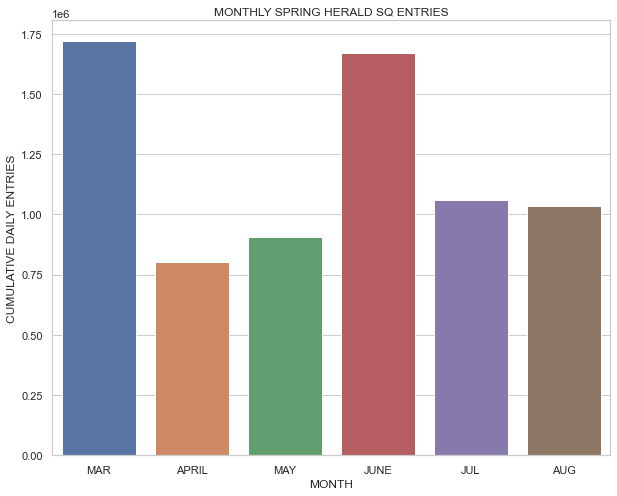

In [265]:
#Herald Sq Monthly Figure
sns.set(rc ={'figure.figsize':(10,8)})
sns.set_theme(style = "whitegrid")
sns.barplot(x = HERALD_SQ_filtered.MONTH, y= HERALD_SQ_filtered['DAILY_ENTRIES'], data = HERALD_SQ_filtered, palette = None).set_title('MONTHLY SPRING HERALD SQ ENTRIES')
plt.xticks([0,1,2,3,4,5],['MAR','APRIL','MAY','JUNE','JUL','AUG'])
plt.ylabel("CUMULATIVE DAILY ENTRIES")
plt.show()

In [225]:
#86th street mask
_86TH_STREET_MASK = (turnstiles_daily["STATION"] == "86 ST")
_86TH_STREET_maskapplied = turnstiles_daily[_86TH_STREET_MASK]
_86TH_STREET_maskapplied

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
110258,C025,R215,00-00-00,86 ST,02/28/2021,352146,02/27/2021,351887.0,259.0
110259,C025,R215,00-00-00,86 ST,03/01/2021,352775,02/28/2021,352146.0,629.0
110260,C025,R215,00-00-00,86 ST,03/02/2021,353389,03/01/2021,352775.0,614.0
110261,C025,R215,00-00-00,86 ST,03/03/2021,354063,03/02/2021,353389.0,674.0
110262,C025,R215,00-00-00,86 ST,03/04/2021,354515,03/03/2021,354063.0,452.0
...,...,...,...,...,...,...,...,...,...
759079,R250,R179,00-00-0B,86 ST,08/30/2021,642871,08/29/2021,641482.0,1389.0
759080,R250,R179,00-00-0B,86 ST,08/31/2021,644406,08/30/2021,642871.0,1535.0
759081,R250,R179,00-00-0B,86 ST,09/01/2021,645817,08/31/2021,644406.0,1411.0
759082,R250,R179,00-00-0B,86 ST,09/02/2021,647162,09/01/2021,645817.0,1345.0


In [227]:
_86TH_STREET_maskapplied['MONTH'] = pd.DatetimeIndex(_86TH_STREET_maskapplied['DATE']).month
_86TH_STREET_maskapplied

/var/folders/q_/d6nfnskx52d1nw5kyyp1bpnh0000gn/T/ipykernel_96490/2327058742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _86TH_STREET_maskapplied['MONTH'] = pd.DatetimeIndex(_86TH_STREET_maskapplied['DATE']).month


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,MONTH
110258,C025,R215,00-00-00,86 ST,02/28/2021,352146,02/27/2021,351887.0,259.0,2
110259,C025,R215,00-00-00,86 ST,03/01/2021,352775,02/28/2021,352146.0,629.0,3
110260,C025,R215,00-00-00,86 ST,03/02/2021,353389,03/01/2021,352775.0,614.0,3
110261,C025,R215,00-00-00,86 ST,03/03/2021,354063,03/02/2021,353389.0,674.0,3
110262,C025,R215,00-00-00,86 ST,03/04/2021,354515,03/03/2021,354063.0,452.0,3
...,...,...,...,...,...,...,...,...,...,...
759079,R250,R179,00-00-0B,86 ST,08/30/2021,642871,08/29/2021,641482.0,1389.0,8
759080,R250,R179,00-00-0B,86 ST,08/31/2021,644406,08/30/2021,642871.0,1535.0,8
759081,R250,R179,00-00-0B,86 ST,09/01/2021,645817,08/31/2021,644406.0,1411.0,9
759082,R250,R179,00-00-0B,86 ST,09/02/2021,647162,09/01/2021,645817.0,1345.0,9


In [228]:
#86th street monthly summation
_86TH_STREET_monthlysum = _86TH_STREET_maskapplied.groupby('MONTH').DAILY_ENTRIES.sum().reset_index()
_86TH_STREET_monthlysum

,MONTH,DAILY_ENTRIES
0,2,11513.0
1,3,754337.0
2,4,1573825.0
3,5,850364.0
4,6,1373086.0
5,7,1293074.0
6,8,853825.0
7,9,82070.0


In [229]:
_86TH_STREET_month_mask = ((_86TH_STREET_monthlysum['MONTH'] > 2) & (_86TH_STREET_monthlysum["MONTH"] < 9))
_86TH_STREET_filtered = _86TH_STREET_monthlysum[_86TH_STREET_month_mask]
_86TH_STREET_filtered

,MONTH,DAILY_ENTRIES
1,3,754337.0
2,4,1573825.0
3,5,850364.0
4,6,1373086.0
5,7,1293074.0
6,8,853825.0


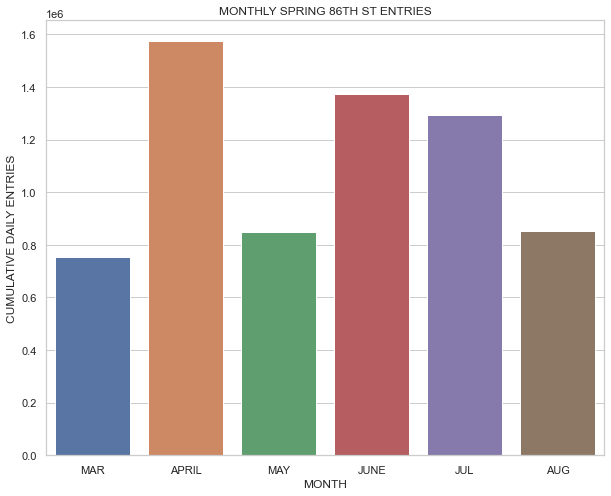

In [266]:
#86TH ST Monthly Figure
sns.set(rc ={'figure.figsize':(10,8)})
sns.set_theme(style = "whitegrid")
sns.barplot(x = _86TH_STREET_filtered.MONTH, y= _86TH_STREET_filtered['DAILY_ENTRIES'], data = _86TH_STREET_filtered, palette = None).set_title('MONTHLY SPRING 86TH ST ENTRIES')
plt.xticks([0,1,2,3,4,5],['MAR','APRIL','MAY','JUNE','JUL','AUG'])
plt.ylabel("CUMULATIVE DAILY ENTRIES")
plt.show()

In [231]:
#PATH NEW WTC ST mask
PATH_NEW_WTC_MASK = (turnstiles_daily["STATION"] == "PATH NEW WTC")
PATH_NEW_WTC_MASK_maskapplied = turnstiles_daily[PATH_NEW_WTC_MASK]
PATH_NEW_WTC_MASK_maskapplied

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
580015,PTH22,R540,00-00-00,PATH NEW WTC,02/28/2021,9134,02/27/2021,8998.0,136.0
580016,PTH22,R540,00-00-00,PATH NEW WTC,03/01/2021,9374,02/28/2021,9134.0,240.0
580017,PTH22,R540,00-00-00,PATH NEW WTC,03/02/2021,9580,03/01/2021,9374.0,206.0
580018,PTH22,R540,00-00-00,PATH NEW WTC,03/03/2021,9853,03/02/2021,9580.0,273.0
580019,PTH22,R540,00-00-00,PATH NEW WTC,03/04/2021,10110,03/03/2021,9853.0,257.0
...,...,...,...,...,...,...,...,...,...
588493,PTH22,R540,00-05-06,PATH NEW WTC,08/30/2021,318371,08/29/2021,317831.0,540.0
588494,PTH22,R540,00-05-06,PATH NEW WTC,08/31/2021,318699,08/30/2021,318371.0,328.0
588495,PTH22,R540,00-05-06,PATH NEW WTC,09/01/2021,319267,08/31/2021,318699.0,568.0
588496,PTH22,R540,00-05-06,PATH NEW WTC,09/02/2021,319276,09/01/2021,319267.0,9.0


In [232]:
#Path new WTC month column created
PATH_NEW_WTC_MASK_maskapplied['MONTH'] = pd.DatetimeIndex(PATH_NEW_WTC_MASK_maskapplied['DATE']).month
PATH_NEW_WTC_MASK_maskapplied

/var/folders/q_/d6nfnskx52d1nw5kyyp1bpnh0000gn/T/ipykernel_96490/3451476688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PATH_NEW_WTC_MASK_maskapplied['MONTH'] = pd.DatetimeIndex(PATH_NEW_WTC_MASK_maskapplied['DATE']).month


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,MONTH
580015,PTH22,R540,00-00-00,PATH NEW WTC,02/28/2021,9134,02/27/2021,8998.0,136.0,2
580016,PTH22,R540,00-00-00,PATH NEW WTC,03/01/2021,9374,02/28/2021,9134.0,240.0,3
580017,PTH22,R540,00-00-00,PATH NEW WTC,03/02/2021,9580,03/01/2021,9374.0,206.0,3
580018,PTH22,R540,00-00-00,PATH NEW WTC,03/03/2021,9853,03/02/2021,9580.0,273.0,3
580019,PTH22,R540,00-00-00,PATH NEW WTC,03/04/2021,10110,03/03/2021,9853.0,257.0,3
...,...,...,...,...,...,...,...,...,...,...
588493,PTH22,R540,00-05-06,PATH NEW WTC,08/30/2021,318371,08/29/2021,317831.0,540.0,8
588494,PTH22,R540,00-05-06,PATH NEW WTC,08/31/2021,318699,08/30/2021,318371.0,328.0,8
588495,PTH22,R540,00-05-06,PATH NEW WTC,09/01/2021,319267,08/31/2021,318699.0,568.0,9
588496,PTH22,R540,00-05-06,PATH NEW WTC,09/02/2021,319276,09/01/2021,319267.0,9.0,9


In [233]:
#monthly Path New WTC summation
PATH_NEW_WTC_monthlysum = PATH_NEW_WTC_MASK_maskapplied.groupby('MONTH').DAILY_ENTRIES.sum().reset_index()
PATH_NEW_WTC_monthlysum

,MONTH,DAILY_ENTRIES
0,2,4808.0
1,3,654417.0
2,4,1009867.0
3,5,1119324.0
4,6,1116750.0
5,7,1558921.0
6,8,764943.0
7,9,429671.0


In [234]:
#Path New WTC filtering for month
PATH_NEW_WTCT_month_mask = ((PATH_NEW_WTC_monthlysum['MONTH'] > 2) & (PATH_NEW_WTC_monthlysum["MONTH"] < 9))
PATH_NEW_WTC_filtered = PATH_NEW_WTC_monthlysum[PATH_NEW_WTCT_month_mask]
PATH_NEW_WTC_filtered

,MONTH,DAILY_ENTRIES
1,3,654417.0
2,4,1009867.0
3,5,1119324.0
4,6,1116750.0
5,7,1558921.0
6,8,764943.0


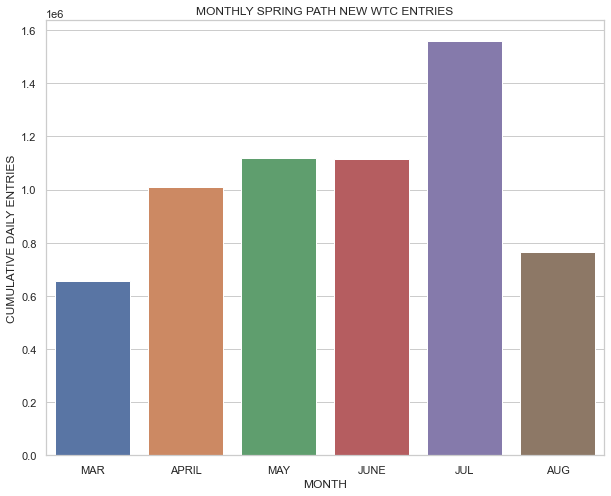

In [267]:
#Path New WTC Monthly Figure
sns.set(rc ={'figure.figsize':(10,8)})
sns.set_theme(style = "whitegrid")
sns.barplot(x = PATH_NEW_WTC_filtered.MONTH, y= PATH_NEW_WTC_filtered['DAILY_ENTRIES'], data = PATH_NEW_WTC_filtered, palette = None).set_title('MONTHLY SPRING PATH NEW WTC ENTRIES')
plt.xticks([0,1,2,3,4,5],['MAR','APRIL','MAY','JUNE','JUL','AUG'])
plt.ylabel("CUMULATIVE DAILY ENTRIES")
plt.show()

In [236]:
#Fulton St Mask
FULTON_MASK = (turnstiles_daily["STATION"] == "FULTON ST")
FULTON_maskapplied = turnstiles_daily[FULTON_MASK]
FULTON_maskapplied

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
56380,A077,R028,03-00-00,FULTON ST,02/28/2021,401570,02/27/2021,401485.0,85.0
56381,A077,R028,03-00-00,FULTON ST,03/01/2021,401829,02/28/2021,401570.0,259.0
56382,A077,R028,03-00-00,FULTON ST,03/02/2021,402101,03/01/2021,401829.0,272.0
56383,A077,R028,03-00-00,FULTON ST,03/03/2021,402429,03/02/2021,402101.0,328.0
56384,A077,R028,03-00-00,FULTON ST,03/04/2021,402692,03/03/2021,402429.0,263.0
...,...,...,...,...,...,...,...,...,...
698480,R208,R014,03-03-01,FULTON ST,08/30/2021,581551,08/29/2021,581453.0,98.0
698481,R208,R014,03-03-01,FULTON ST,08/31/2021,581648,08/30/2021,581551.0,97.0
698482,R208,R014,03-03-01,FULTON ST,09/01/2021,581717,08/31/2021,581648.0,69.0
698483,R208,R014,03-03-01,FULTON ST,09/02/2021,581765,09/01/2021,581717.0,48.0


In [237]:
#Fulton St month column created
FULTON_maskapplied['MONTH'] = pd.DatetimeIndex(FULTON_maskapplied['DATE']).month
FULTON_maskapplied

/var/folders/q_/d6nfnskx52d1nw5kyyp1bpnh0000gn/T/ipykernel_96490/2184834444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FULTON_maskapplied['MONTH'] = pd.DatetimeIndex(FULTON_maskapplied['DATE']).month


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,MONTH
56380,A077,R028,03-00-00,FULTON ST,02/28/2021,401570,02/27/2021,401485.0,85.0,2
56381,A077,R028,03-00-00,FULTON ST,03/01/2021,401829,02/28/2021,401570.0,259.0,3
56382,A077,R028,03-00-00,FULTON ST,03/02/2021,402101,03/01/2021,401829.0,272.0,3
56383,A077,R028,03-00-00,FULTON ST,03/03/2021,402429,03/02/2021,402101.0,328.0,3
56384,A077,R028,03-00-00,FULTON ST,03/04/2021,402692,03/03/2021,402429.0,263.0,3
...,...,...,...,...,...,...,...,...,...,...
698480,R208,R014,03-03-01,FULTON ST,08/30/2021,581551,08/29/2021,581453.0,98.0,8
698481,R208,R014,03-03-01,FULTON ST,08/31/2021,581648,08/30/2021,581551.0,97.0,8
698482,R208,R014,03-03-01,FULTON ST,09/01/2021,581717,08/31/2021,581648.0,69.0,9
698483,R208,R014,03-03-01,FULTON ST,09/02/2021,581765,09/01/2021,581717.0,48.0,9


In [238]:
#monthly Fulton St summation
FULTON_monthlysum = FULTON_maskapplied.groupby('MONTH').DAILY_ENTRIES.sum().reset_index()
FULTON_monthlysum

,MONTH,DAILY_ENTRIES
0,2,7598.0
1,3,1174585.0
2,4,536087.0
3,5,601398.0
4,6,1471034.0
5,7,2013109.0
6,8,712082.0
7,9,68903.0


In [239]:
#Fulton filtering for month
FULTON_month_mask = ((FULTON_monthlysum['MONTH'] > 2) & (FULTON_monthlysum["MONTH"] < 9))
FULTON_filtered = FULTON_monthlysum[FULTON_month_mask]
FULTON_filtered

,MONTH,DAILY_ENTRIES
1,3,1174585.0
2,4,536087.0
3,5,601398.0
4,6,1471034.0
5,7,2013109.0
6,8,712082.0


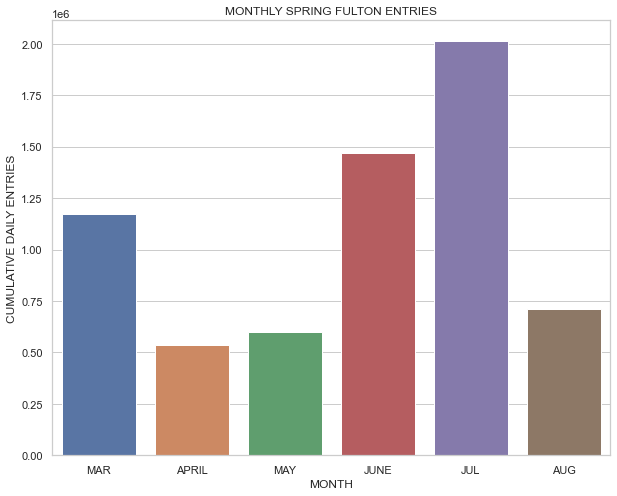

In [268]:
#Fulton Monthly Figure
sns.set(rc ={'figure.figsize':(10,8)})
sns.set_theme(style = "whitegrid")
sns.barplot(x = FULTON_filtered.MONTH, y= FULTON_filtered['DAILY_ENTRIES'], data = FULTON_filtered, palette = None).set_title('MONTHLY SPRING FULTON ENTRIES')
plt.xticks([0,1,2,3,4,5],['MAR','APRIL','MAY','JUNE','JUL','AUG'])
plt.ylabel("CUMULATIVE DAILY ENTRIES")
plt.show()

In [276]:
#Create a date_time column from original daily table for day of the week analysis

turnstiles_daily['DATE_TIME'] = pd.to_datetime(turnstiles_daily.DATE, format="%m/%d/%Y")
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DATE_TIME
1,A002,R051,02-00-00,59 ST,02/28/2021,7537852,02/27/2021,7537589.0,263.0,2021-02-28
2,A002,R051,02-00-00,59 ST,03/01/2021,7538400,02/28/2021,7537852.0,548.0,2021-03-01
3,A002,R051,02-00-00,59 ST,03/02/2021,7538926,03/01/2021,7538400.0,526.0,2021-03-02
4,A002,R051,02-00-00,59 ST,03/03/2021,7539503,03/02/2021,7538926.0,577.0,2021-03-03
5,A002,R051,02-00-00,59 ST,03/04/2021,7540040,03/03/2021,7539503.0,537.0,2021-03-04


In [280]:
#create a day column extracting day from date_time
turnstiles_daily['DAY'] = pd.DatetimeIndex(turnstiles_daily['DATE_TIME']).dayofweek
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,DATE_TIME,DAY
1,A002,R051,02-00-00,59 ST,02/28/2021,7537852,02/27/2021,7537589.0,263.0,2021-02-28,6
2,A002,R051,02-00-00,59 ST,03/01/2021,7538400,02/28/2021,7537852.0,548.0,2021-03-01,0
3,A002,R051,02-00-00,59 ST,03/02/2021,7538926,03/01/2021,7538400.0,526.0,2021-03-02,1
4,A002,R051,02-00-00,59 ST,03/03/2021,7539503,03/02/2021,7538926.0,577.0,2021-03-03,2
5,A002,R051,02-00-00,59 ST,03/04/2021,7540040,03/03/2021,7539503.0,537.0,2021-03-04,3
...,...,...,...,...,...,...,...,...,...,...,...
943779,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554,08/29/2021,5554.0,0.0,2021-08-30,0
943780,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/31/2021,5554,08/30/2021,5554.0,0.0,2021-08-31,1
943781,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/01/2021,5554,08/31/2021,5554.0,0.0,2021-09-01,2
943782,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/02/2021,5554,09/01/2021,5554.0,0.0,2021-09-02,3


In [320]:
#summation of daily entries by day of week
Station_Daily_AVG_totals = turnstiles_daily.groupby(['STATION', 'DAY']).DAILY_ENTRIES.sum().reset_index()
Station_Daily_AVG_totals

,STATION,DAY,DAILY_ENTRIES
0,1 AV,0,1333281.0
1,1 AV,1,718835.0
2,1 AV,2,398902.0
3,1 AV,3,202014.0
4,1 AV,4,210551.0
...,...,...,...
2648,ZEREGA AV,2,29759.0
2649,ZEREGA AV,3,28729.0
2650,ZEREGA AV,4,28314.0
2651,ZEREGA AV,5,14529.0


In [346]:
#subset of data for top 5 stations
top_5_station_filters = ['34 ST-HERALD SQ', '34 ST-PENN STA','86 ST', 'PATH NEW WTC', 'FULTON ST']
top_5_daily_avg_totals = Station_Daily_AVG_totals[Station_Daily_AVG_totals.STATION.isin(top_5_station_filters)]
top_5_daily_avg_totals

,STATION,DAY,DAILY_ENTRIES
413,34 ST-HERALD SQ,0,843286.0
414,34 ST-HERALD SQ,1,1122587.0
415,34 ST-HERALD SQ,2,938106.0
416,34 ST-HERALD SQ,3,2298701.0
417,34 ST-HERALD SQ,4,929222.0
418,34 ST-HERALD SQ,5,647592.0
419,34 ST-HERALD SQ,6,525532.0
427,34 ST-PENN STA,0,1291199.0
428,34 ST-PENN STA,1,1370844.0
429,34 ST-PENN STA,2,1175463.0


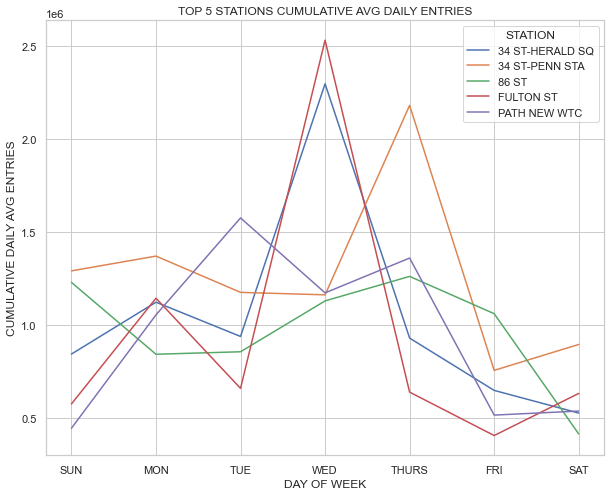

In [363]:
#Day of Week visualtion for top 5 stations
sns.set(rc ={'figure.figsize':(10,8)})
sns.set_theme(style = "whitegrid")
sns.lineplot(x = top_5_daily_avg_totals.DAY, y= top_5_daily_avg_totals['DAILY_ENTRIES'], hue = "STATION", data = top_5_daily_avg_totals, palette = None).set_title('TOP 5 STATIONS CUMULATIVE AVG DAILY ENTRIES')
plt.xticks([0,1,2,3,4,5,6],['SUN','MON','TUE','WED','THURS','FRI', 'SAT'])
plt.xlabel("DAY OF WEEK")
plt.ylabel("CUMULATIVE DAILY AVG ENTRIES")

plt.show()